# Emotion Detection Using Natural Language Processing Sentiment Analysis

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from collections import defaultdict

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/markshteyn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/markshteyn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [51]:
df = pd.read_csv('data/text.csv')

## Data Cleaning

In [52]:
df = df.dropna()
df = df.drop_duplicates()
df = df.drop(columns=['Unnamed: 0'])
df = df.reset_index(drop=True)

In [53]:
from sklearn.model_selection import train_test_split

# Simple text cleaning process
df['text'] = df['text'].str.lower().str.replace('', '')

# Split the dfset
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [54]:
df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


## Data Visualization

In [55]:
emotions = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']

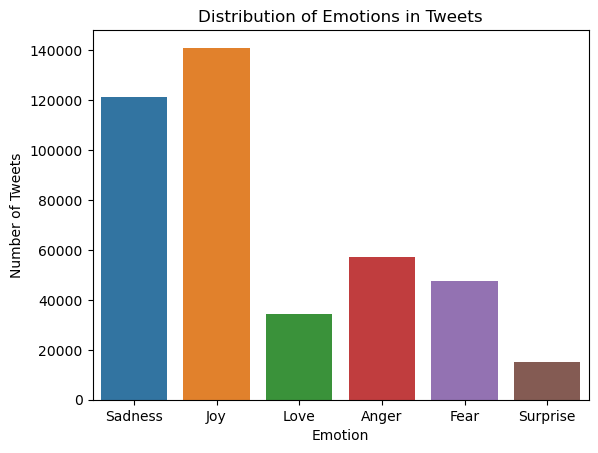

In [56]:
# Visualize the distribution of emotions
sns.countplot(x='label', data=df)
plt.title('Distribution of Emotions in Tweets')
plt.xlabel('Emotion')
plt.ylabel('Number of Tweets')
plt.xticks(ticks=range(6), labels=emotions)
plt.show()

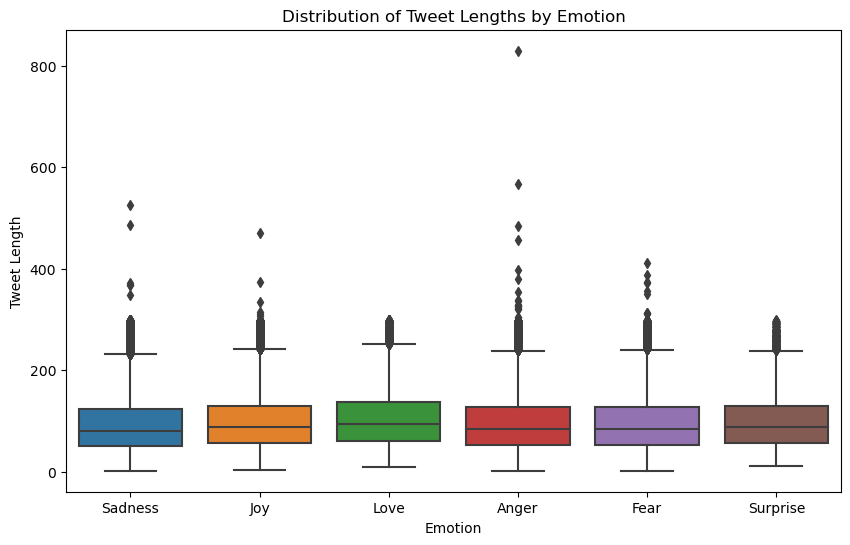

In [57]:
# Calculate tweet lengths
df['text_length'] = df['text'].apply(len)

# Visualize the distribution of text lengths for each emotion
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='text_length', data=df)
plt.title('Distribution of Tweet Lengths by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Tweet Length')
plt.xticks(ticks=range(6), labels=['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'])
plt.show()

feel 6
feeling 6
like 6
im 6
really 6
know 6
time 6
little 6
get 6
ive 5
would 6
people 6
still 6
even 6
want 5
think 6
one 6
life 5
bit 4
dont 4
much 6
things 5
something 5
way 5
day 2
going 5
make 2
could 5
go 4
back 3
right 2
cant 2
pretty 2
always 2
love 3
feelings 2
say 2
see 2
overwhelmed 2
weird 2
strange 2


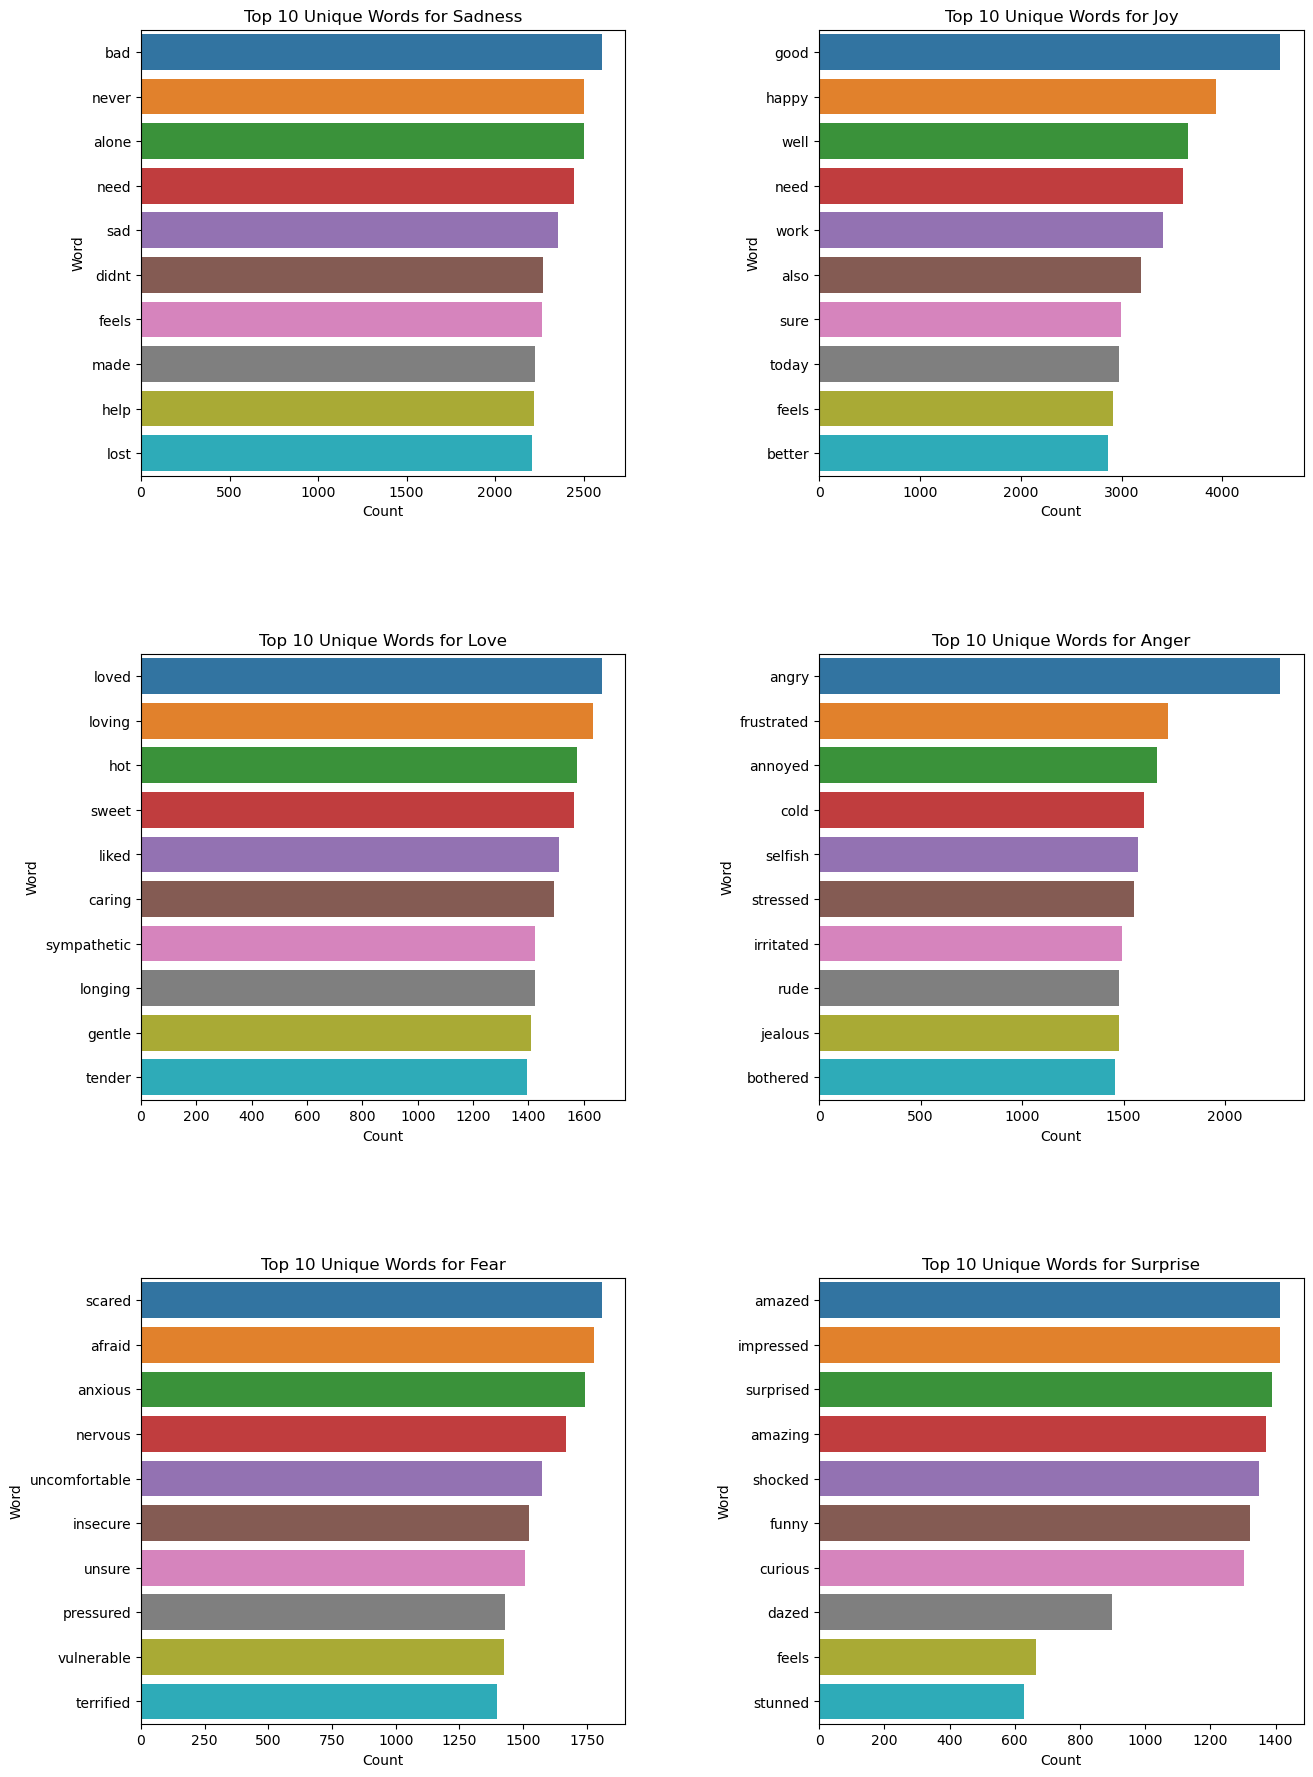

In [63]:
stop_words = set(nltk.corpus.stopwords.words('english'))
n = 10  # Number of words to display for each emotion

# Track the top 20 words for each emotion and their frequencies
emotion_top_words = defaultdict(lambda: defaultdict(int))

# First, identify the top 20 words for each emotion
for emotion_id, emotion in enumerate(emotions):
    emotion_tweets = " ".join(tweet for tweet in df[df['label'] == emotion_id]['text'])
    words = word_tokenize(emotion_tweets)
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    word_counts = Counter(filtered_words).most_common(n*4)
    
    for word, count in word_counts:
        emotion_top_words[emotion][word] = count

# Find words that are common to two or more emotions
common_across_emotions = set()
word_emotion_counts = defaultdict(int)

for emotion, words in emotion_top_words.items():
    for word in words:
        word_emotion_counts[word] += 1

# Select words that appear in top 20 of two or more emotions
for word, count in word_emotion_counts.items():
    if count >= 2:
        print(word, count)
        common_across_emotions.add(word)

# Set up the matplotlib figure (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(15, 22))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, emotion in enumerate(emotions):
    emotion_id = i  # Adjusted for zero-based index
    ax = axes[i // 2, i % 2]  # Determine the subplot for the current loop iteration

    # Filter tweets by emotion and remove common words across emotions
    emotion_tweets = " ".join(tweet for tweet in df[df['label'] == emotion_id]['text'])
    words = word_tokenize(emotion_tweets)
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words and word not in common_across_emotions]
    
    # Count and plot
    word_counts = Counter(filtered_words).most_common(n)
    words_df = pd.DataFrame(word_counts, columns=['word', 'count'])

    # Plot on the determined subplot
    sns.barplot(x='count', y='word', data=words_df, ax=ax)
    ax.set_title(f'Top {n} Unique Words for {emotion}')
    ax.set_xlabel('Count')
    ax.set_ylabel('Word')

# For any empty subplots not used (if your number of emotions is odd), hide them
if len(emotions) % 2 != 0:
    axes[-1, -1].axis('off')

plt.show()


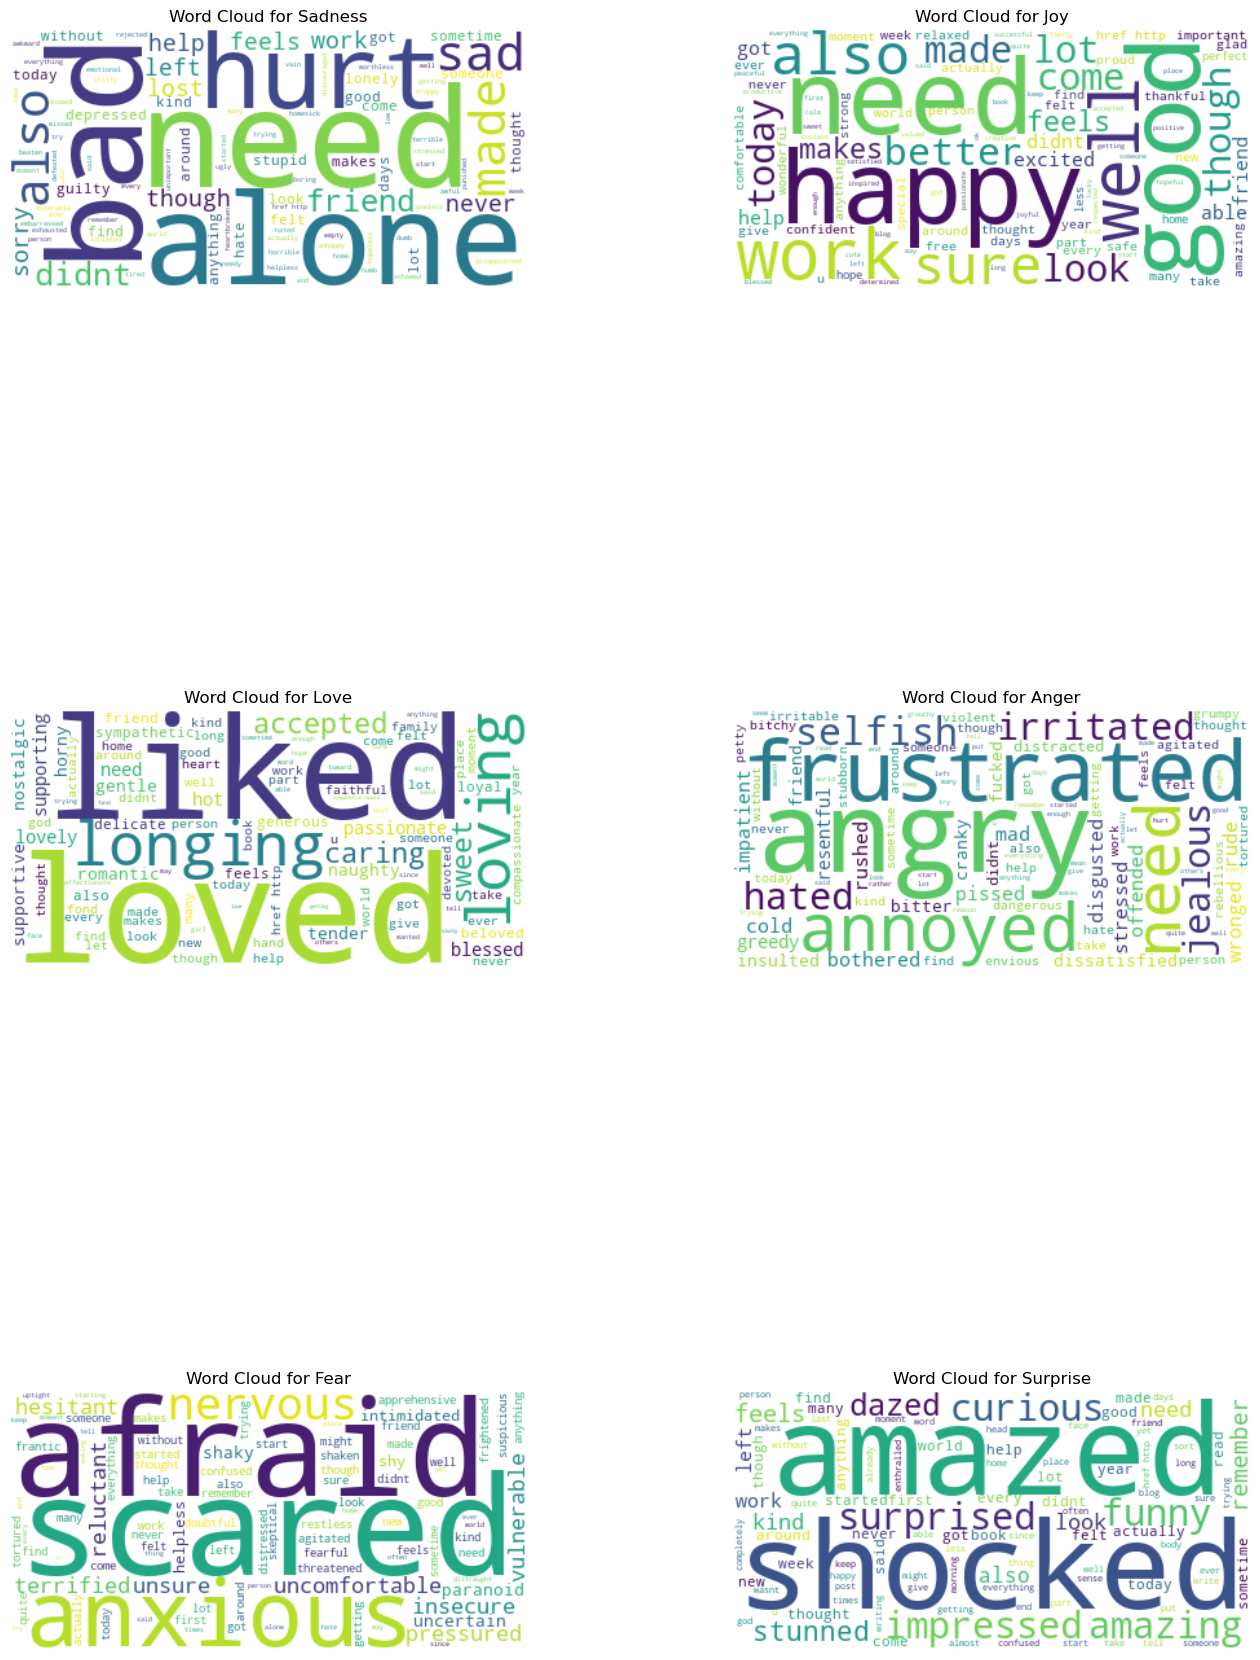

In [64]:
stop_words = set(stopwords.words('english'))
emotions = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']
word_appearances = defaultdict(int)  # Track how many times a word appears in top 20 across emotions

# Step 1: Aggregate top 20 words per emotion and count their appearances across emotions
for emotion_id, emotion in enumerate(emotions):
    emotion_tweets = " ".join(tweet for tweet in df[df['label'] == emotion_id]['text'])
    words = word_tokenize(emotion_tweets)
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    word_counts = Counter(filtered_words).most_common(n*4)
    
    for word, _ in word_counts:
        word_appearances[word] += 1

# Identify words that appear in the top 20 for two or more emotions
common_across_emotions = {word for word, count in word_appearances.items() if count >= 2}

# Step 2: Generate word clouds, excluding words common across two or more emotions
fig, axes = plt.subplots(3, 2, figsize=(16, 24))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, emotion in enumerate(emotions):
    emotion_id = i  # Adjusted for zero-based index
    ax = axes[i // 2, i % 2]  # Determine the subplot for the current loop iteration
    
    emotion_tweets = " ".join(tweet for tweet in df[df['label'] == emotion_id]['text'])
    wordcloud = WordCloud(stopwords=stop_words.union(common_across_emotions), background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(emotion_tweets)
    
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Word Cloud for {emotion}')
    ax.axis('off')

# For any empty subplots not used, hide them
if len(emotions) % 2 != 0:
    axes[-1, -1].axis('off')

plt.show()

## Feature Extraction

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=10000, ngram_range=(1,2))

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

## Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)
y_pred = model.predict(X_test_vectorized)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9059283606439384

Confusion Matrix:
[[22951   431    51   433   304    31]
 [  262 26426  1154   104    69   149]
 [   44  1493  5353    27    10     2]
 [  478   183    19 10461   291     9]
 [  427   146    19   345  8170   487]
 [   31   232    10     7   594  2159]]


In [76]:
# Test the model
sentence = 'I am so petrified lmmaooo but also happy'

# Vectorize the sentence
sentence_vectorized = vectorizer.transform([sentence])

# Make a prediction
prediction = model.predict(sentence_vectorized)
print(f'Sentence: {sentence}')
print(f'Predicted emotion: {emotions[prediction[0]]}')

Sentence: I am so petrified lmmaooo but also happy
Predicted emotion: Fear


In [77]:
# Save the model
import joblib

joblib.dump(model, 'emotion_classifier.joblib')
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')

# Load the model
model = joblib.load('emotion_classifier.joblib')
vectorizer = joblib.load('tfidf_vectorizer.joblib')